# Лабораторная работа 8

## 1. Начальные условия

### a. Dataset

В рамках проекта был выбран датасет Object Detection - Wildlife Dataset - YOLO Format. Данный набор данных предназначен для задачи детекции объектов и содержит аннотированные изображения с четырьмя классами диких животных. Аннотации выполнены в формате YOLO, что делает его удобным для обучения современных нейронных сетей для задачи обнаружения объектов.

Задача автоматического обнаружения животных на изображениях имеет широкий спектр практических применений в реальной жизни. Одним из основных сценариев является использование таких систем в фотоловушках, которые применяются в научных исследованиях для мониторинга популяций диких животных, изучения их поведения, миграции и численности, а также в проектах по сохранению биоразнообразия.


In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle
!pip install pandas

In [3]:
!pip install ultralytics kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
!kaggle datasets download -d ankanghosh651/object-detection-wildlife-dataset-yolo-format -p data8 --unzip

Dataset URL: https://www.kaggle.com/datasets/ankanghosh651/object-detection-wildlife-dataset-yolo-format
License(s): MIT
100% 447M/449M [00:00<00:00, 373MB/s]
100% 449M/449M [00:00<00:00, 477MB/s]


path: data8/final_data
train: train/images
val: valid/images
test: test/images

nc: 4
names: ['buffalo', 'elephant', 'rhino', 'zebra']


In [5]:
!pip install ultralytics

### b. Метрики качества

В процессе обучения и последующего тестирования модели для количественной оценки её качества будут использованы две ключевые метрики: mAP@0.5 и mAP@0.5:0.95.

Первая метрика, mAP@0.5 (mean Average Precision при пороге Intersection over Union (IoU) равном 0.5), показывает среднюю точность модели по всем классам объектов, если модель правильно определяет границы объекта с перекрытием не менее 50% с эталонной разметкой. Данная метрика является стандартной и широко используется в задачах детекции объектов для получения быстрой и понятной оценки точности модели.

Вторая метрика, mAP@0.5:0.95, представляет собой более строгую и комплексную оценку. Она рассчитывается как среднее значение mAP, измеренное при различных порогах IoU от 0.5 до 0.95 с шагом 0.05. Этот подход даёт более полное представление о способности модели точно определять границы объектов при различных уровнях перекрытия. Метрика mAP@0.5:0.95 принята в качестве основного стандарта в соревнованиях по детекции объектов, таких как COCO, и считается более надёжным показателем общего качества модели.

## 2. Создание бейзлайна и оценка качества


Импортируем YOLO 11 версии формата nano:

In [ ]:
from ultralytics import YOLO

yolo_cnn = YOLO('yolo11n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]


## Запуск обучения

In [ ]:
res_yolo = yolo_cnn.train(
    data='data8/final_data/data.yaml',
    epochs=15,
    imgsz=512,
    batch=32,
    name='wildlife_yolo',
    amp=True
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data8/final_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=wildlife_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 28.4MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1769.9±1170.3 MB/s, size: 207.6 KB)


train: Scanning /content/data8/final_data/train/labels... 1203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1203/1203 [00:00<00:00, 2162.25it/s]

train: New cache created: /content/data8/final_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 712.3±683.9 MB/s, size: 135.6 KB)


val: Scanning /content/data8/final_data/valid/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 1960.15it/s]

val: New cache created: /content/data8/final_data/valid/labels.cache


Plotting labels to runs/detect/wildlife_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/wildlife_yolo
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15       2.7G     0.8733      2.663      1.187         75        512: 100%|██████████| 38/38 [00:21<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        150        262    0.00675      0.967      0.539      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.03G     0.9288      1.543      1.226         85        512: 100%|██████████| 38/38 [00:21<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        150        262       0.65      0.613      0.735       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.05G     0.9597      1.302      1.203         66        512: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all        150        262      0.653      0.678      0.746      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.05G     0.9349      1.238      1.208         87        512: 100%|██████████| 38/38 [00:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        150        262      0.521      0.642       0.63      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.05G      0.925      1.166      1.201         76        512: 100%|██████████| 38/38 [00:20<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all        150        262      0.735      0.693      0.775      0.566


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.05G     0.8465      1.202      1.161         32        512: 100%|██████████| 38/38 [00:22<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        150        262      0.783      0.692      0.765      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.05G     0.8188      1.054      1.136         32        512: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all        150        262      0.791      0.821      0.875       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.05G      0.806      1.015      1.113         35        512: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all        150        262      0.766      0.743      0.817      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.05G     0.7466     0.8848      1.083         32        512: 100%|██████████| 38/38 [00:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]


                   all        150        262      0.831      0.794      0.865      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.05G     0.7325     0.8409      1.067         39        512: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all        150        262      0.901      0.868      0.928      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.05G     0.6986     0.7269      1.041         24        512: 100%|██████████| 38/38 [00:27<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        150        262      0.948        0.9       0.96      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.05G     0.6516     0.6726      1.015         30        512: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all        150        262      0.907      0.898      0.942      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.06G     0.6209     0.6327      1.005         30        512: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all        150        262      0.932      0.904      0.944      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.06G     0.6065     0.6018     0.9878         38        512: 100%|██████████| 38/38 [00:18<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all        150        262      0.955      0.904      0.954      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.06G     0.5703     0.5686       0.96         23        512: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all        150        262      0.961      0.897      0.951      0.818



15 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/wildlife_yolo/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/wildlife_yolo/weights/best.pt, 5.4MB

Validating runs/detect/wildlife_yolo/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


                   all        150        262      0.961      0.897      0.951      0.818
               buffalo         38         60      0.933      0.917      0.929      0.834
              elephant         43         83      0.967       0.88      0.969       0.78
                 rhino         42         58          1      0.964      0.992      0.912
                 zebra         28         61      0.944      0.828      0.913      0.747
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/wildlife_yolo


Учитывая небольшое количество эпох обучения, результат довольно хорош - средний показатель mAP50 = 0.951, а mAP50-95 = 0.818

Yolo так же генерирует информацию об обучении. Посмотрим на confusion matrix, график побучения и валидационный батч:

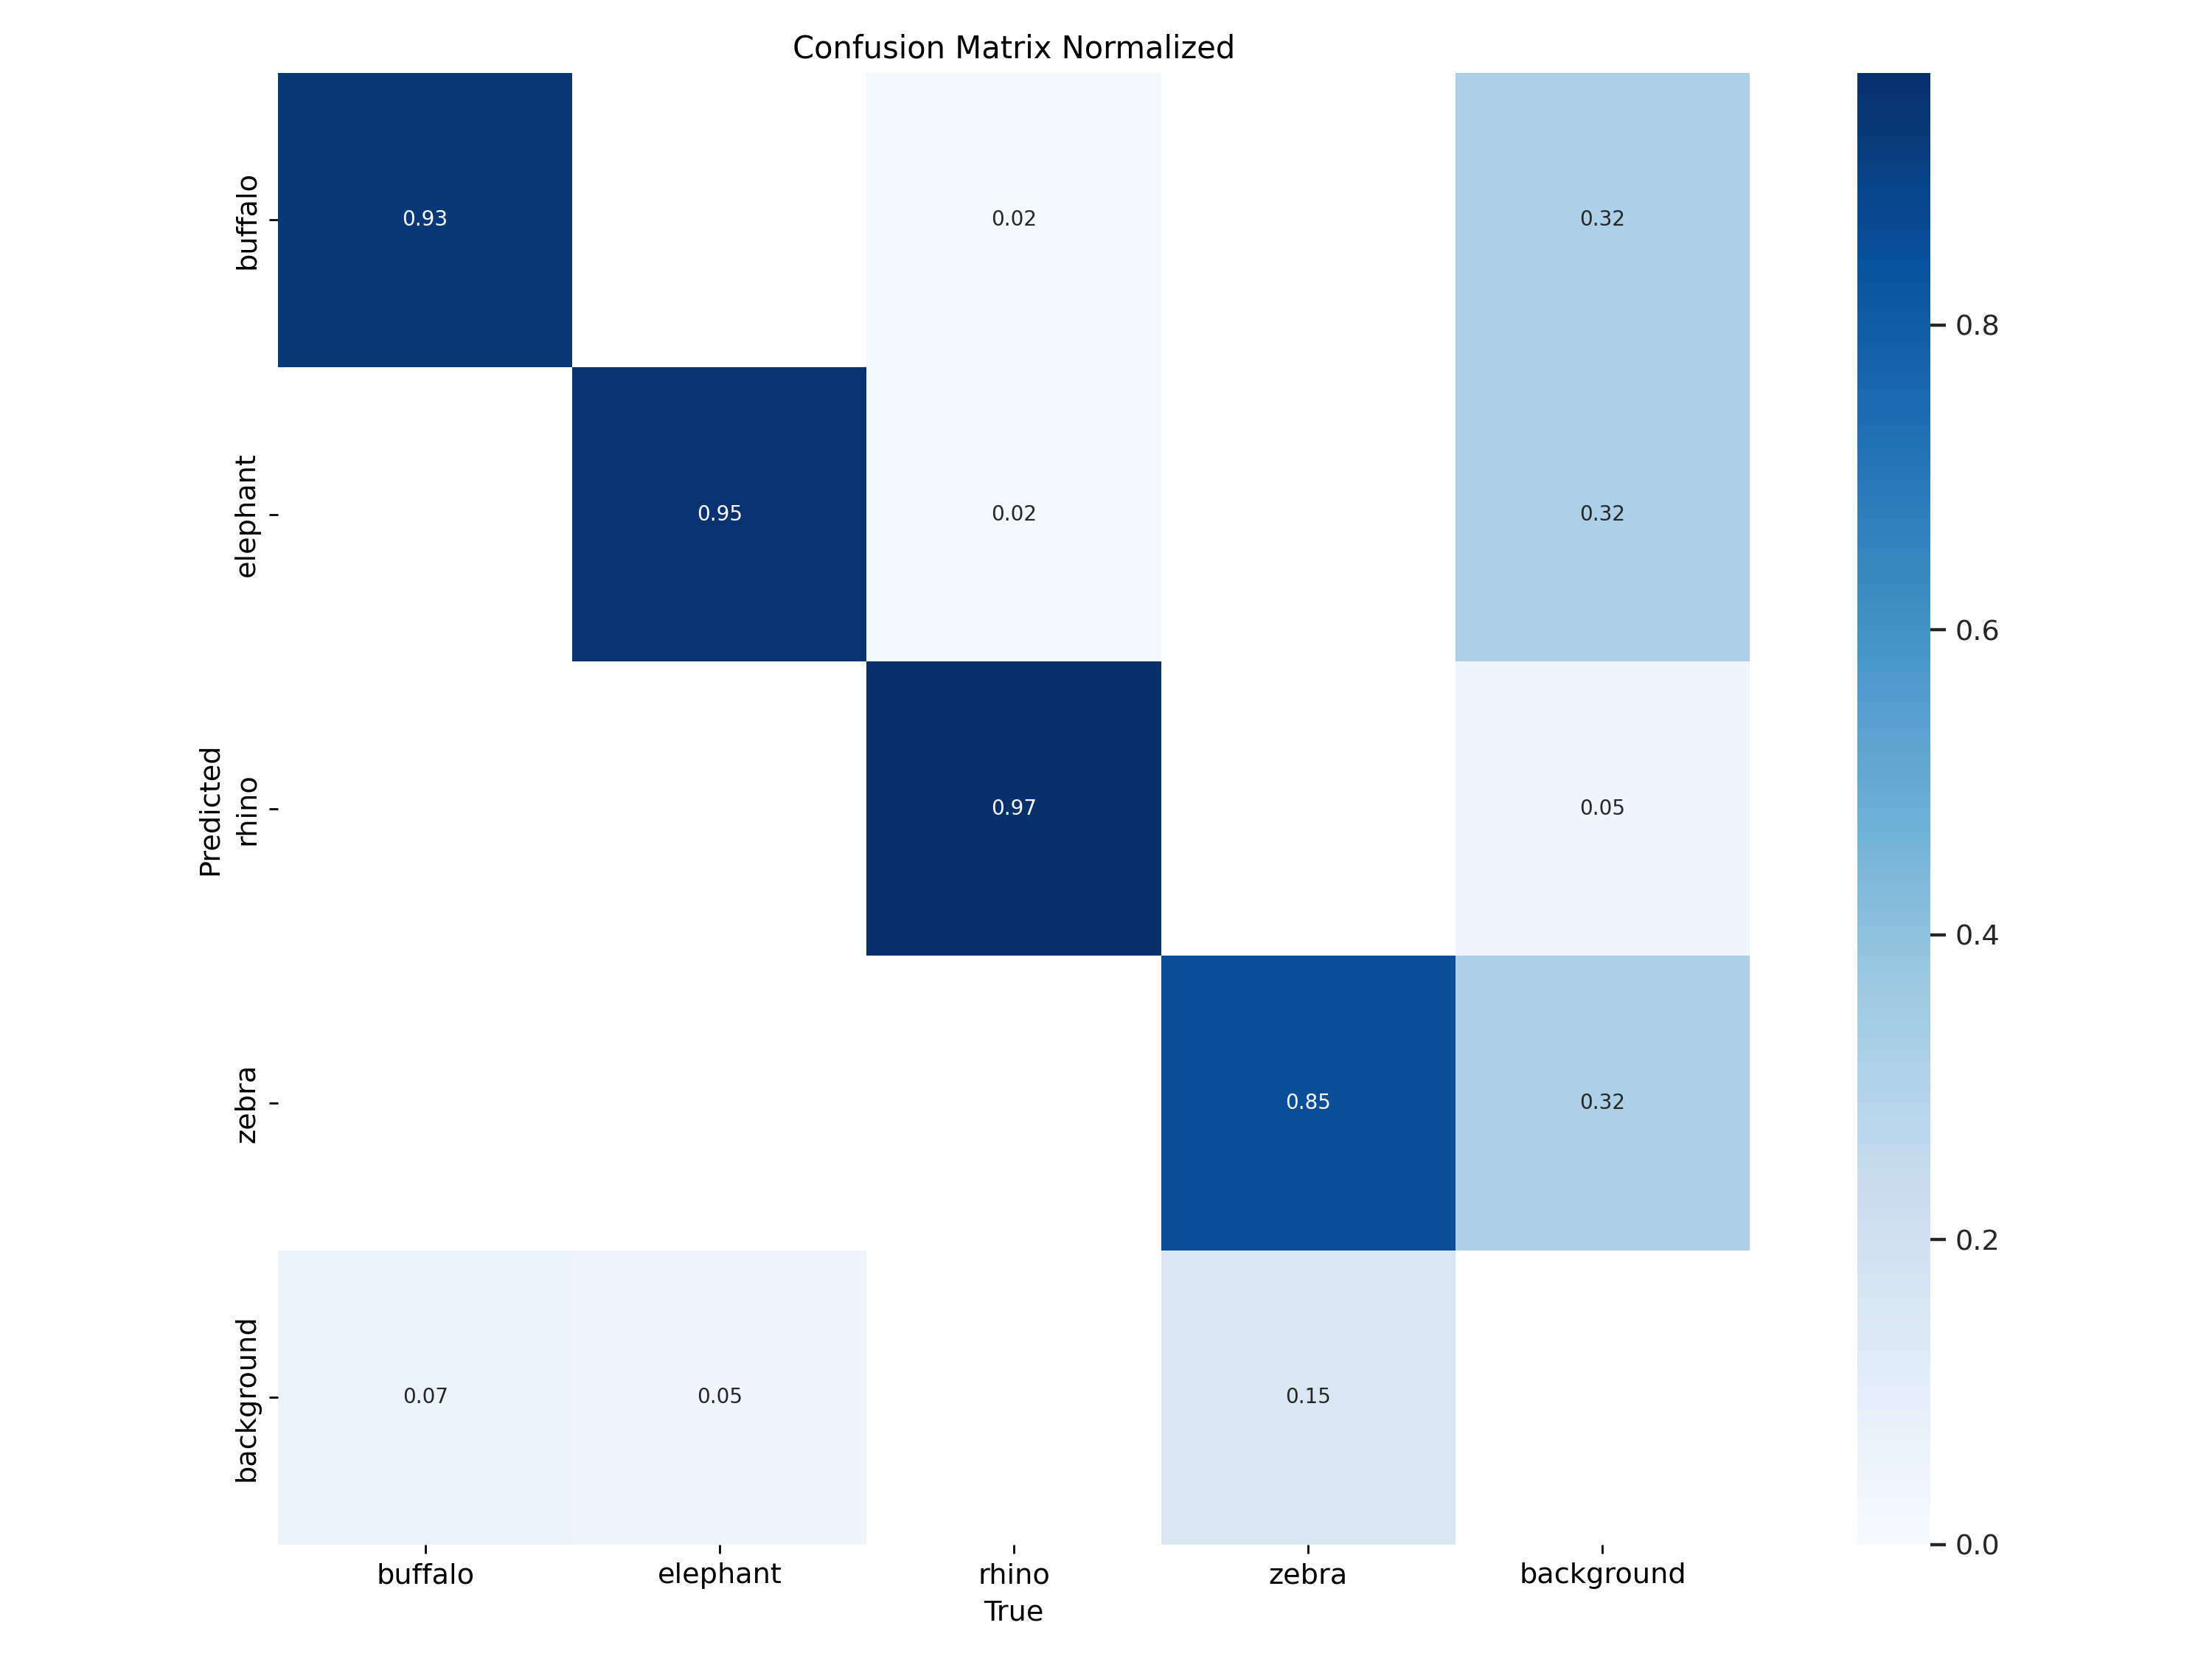

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/wildlife_yolo/confusion_matrix_normalized.png')

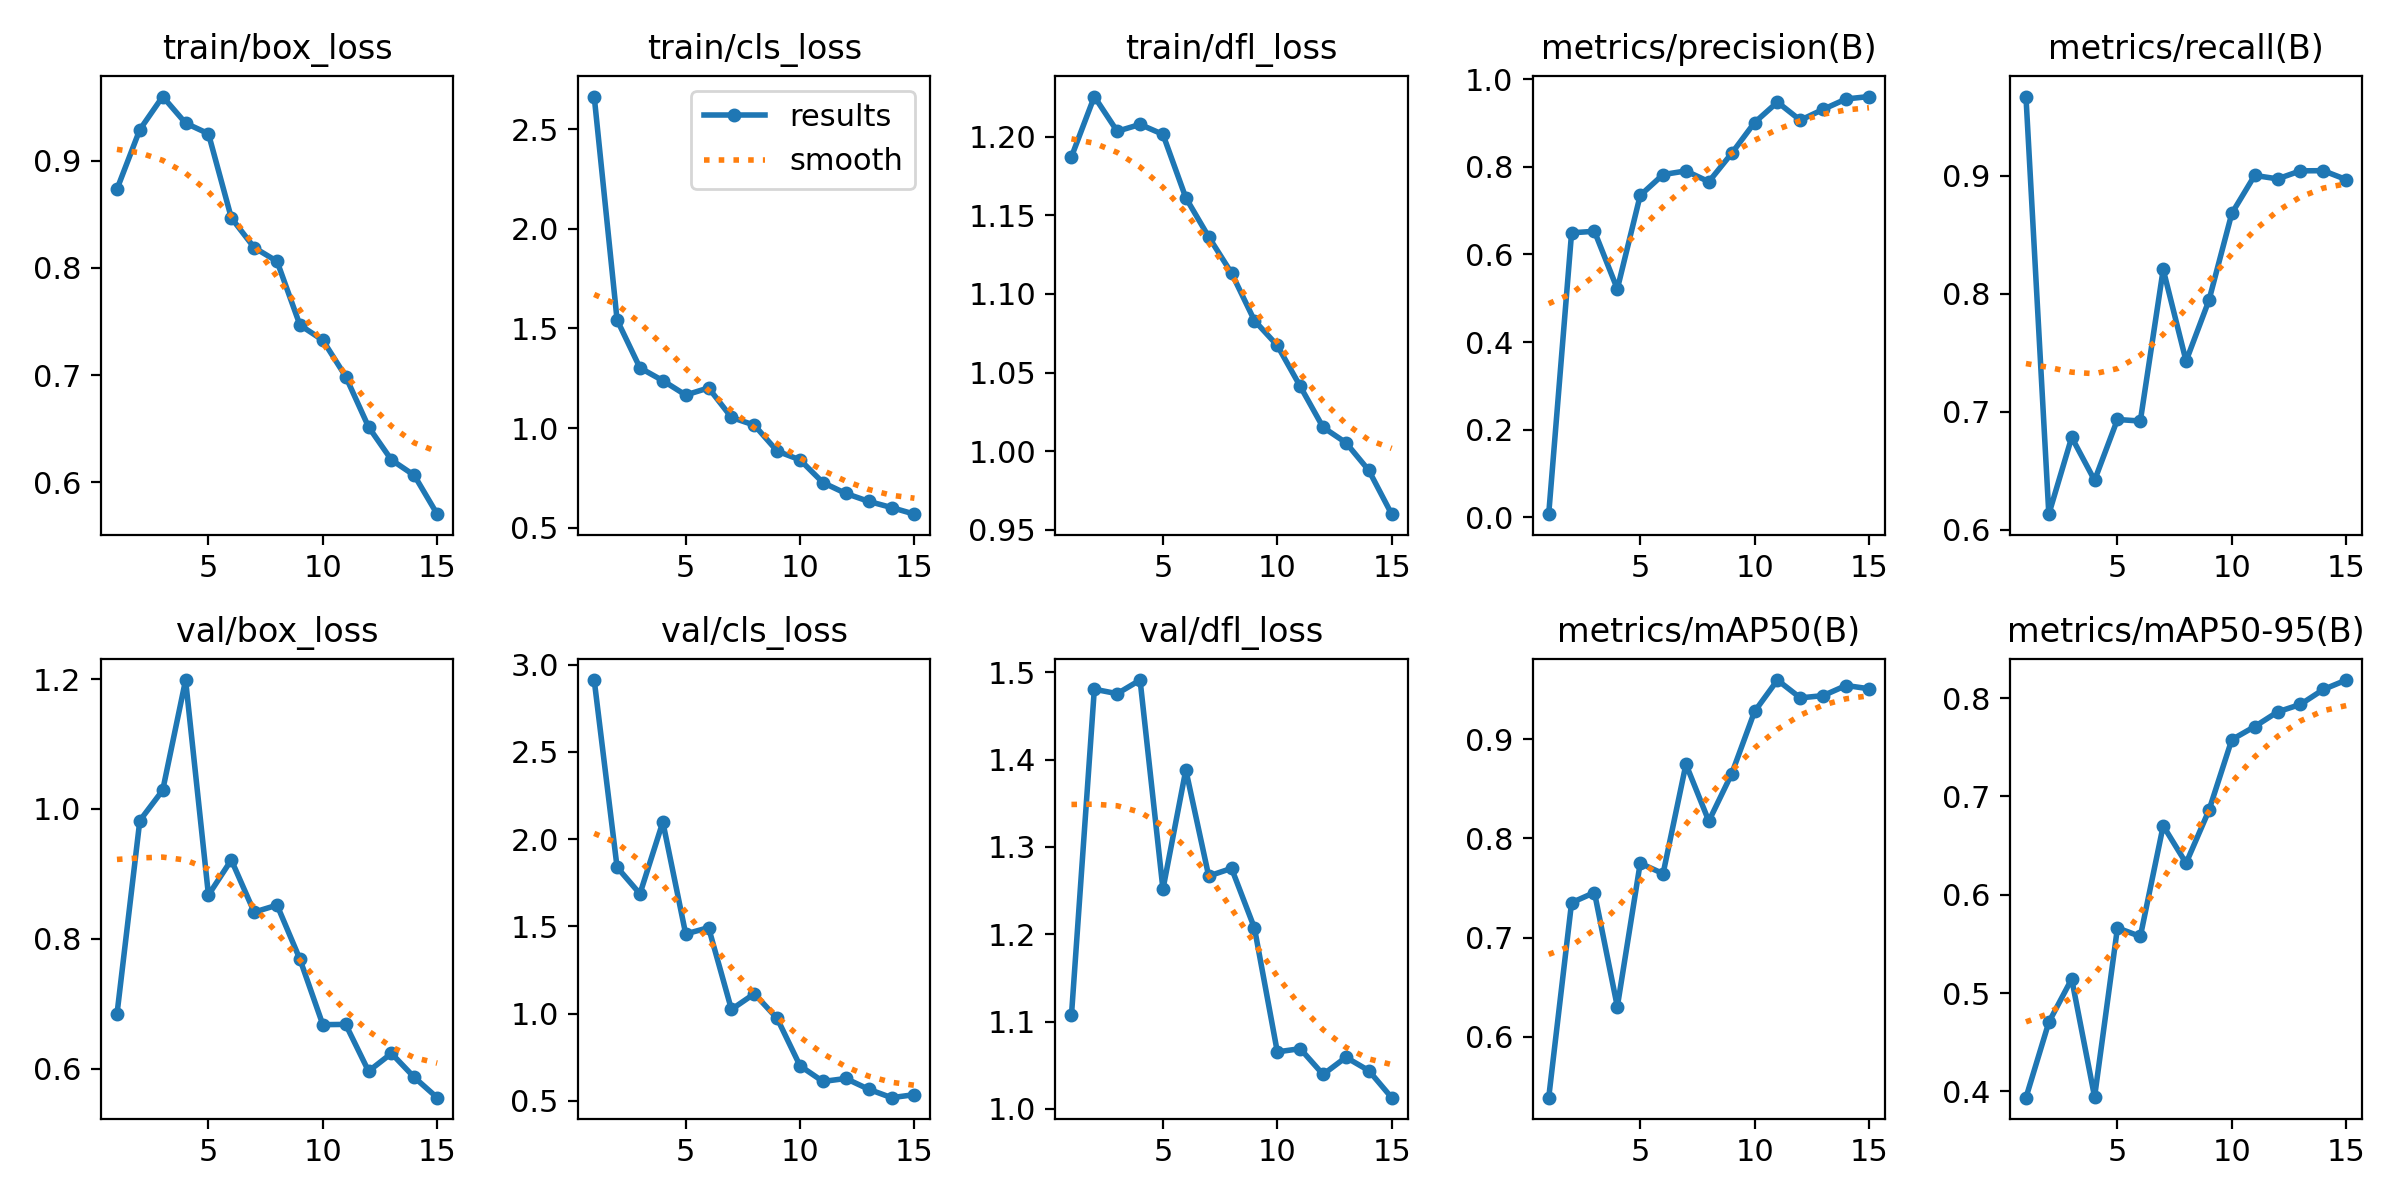

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/wildlife_yolo/results.png')

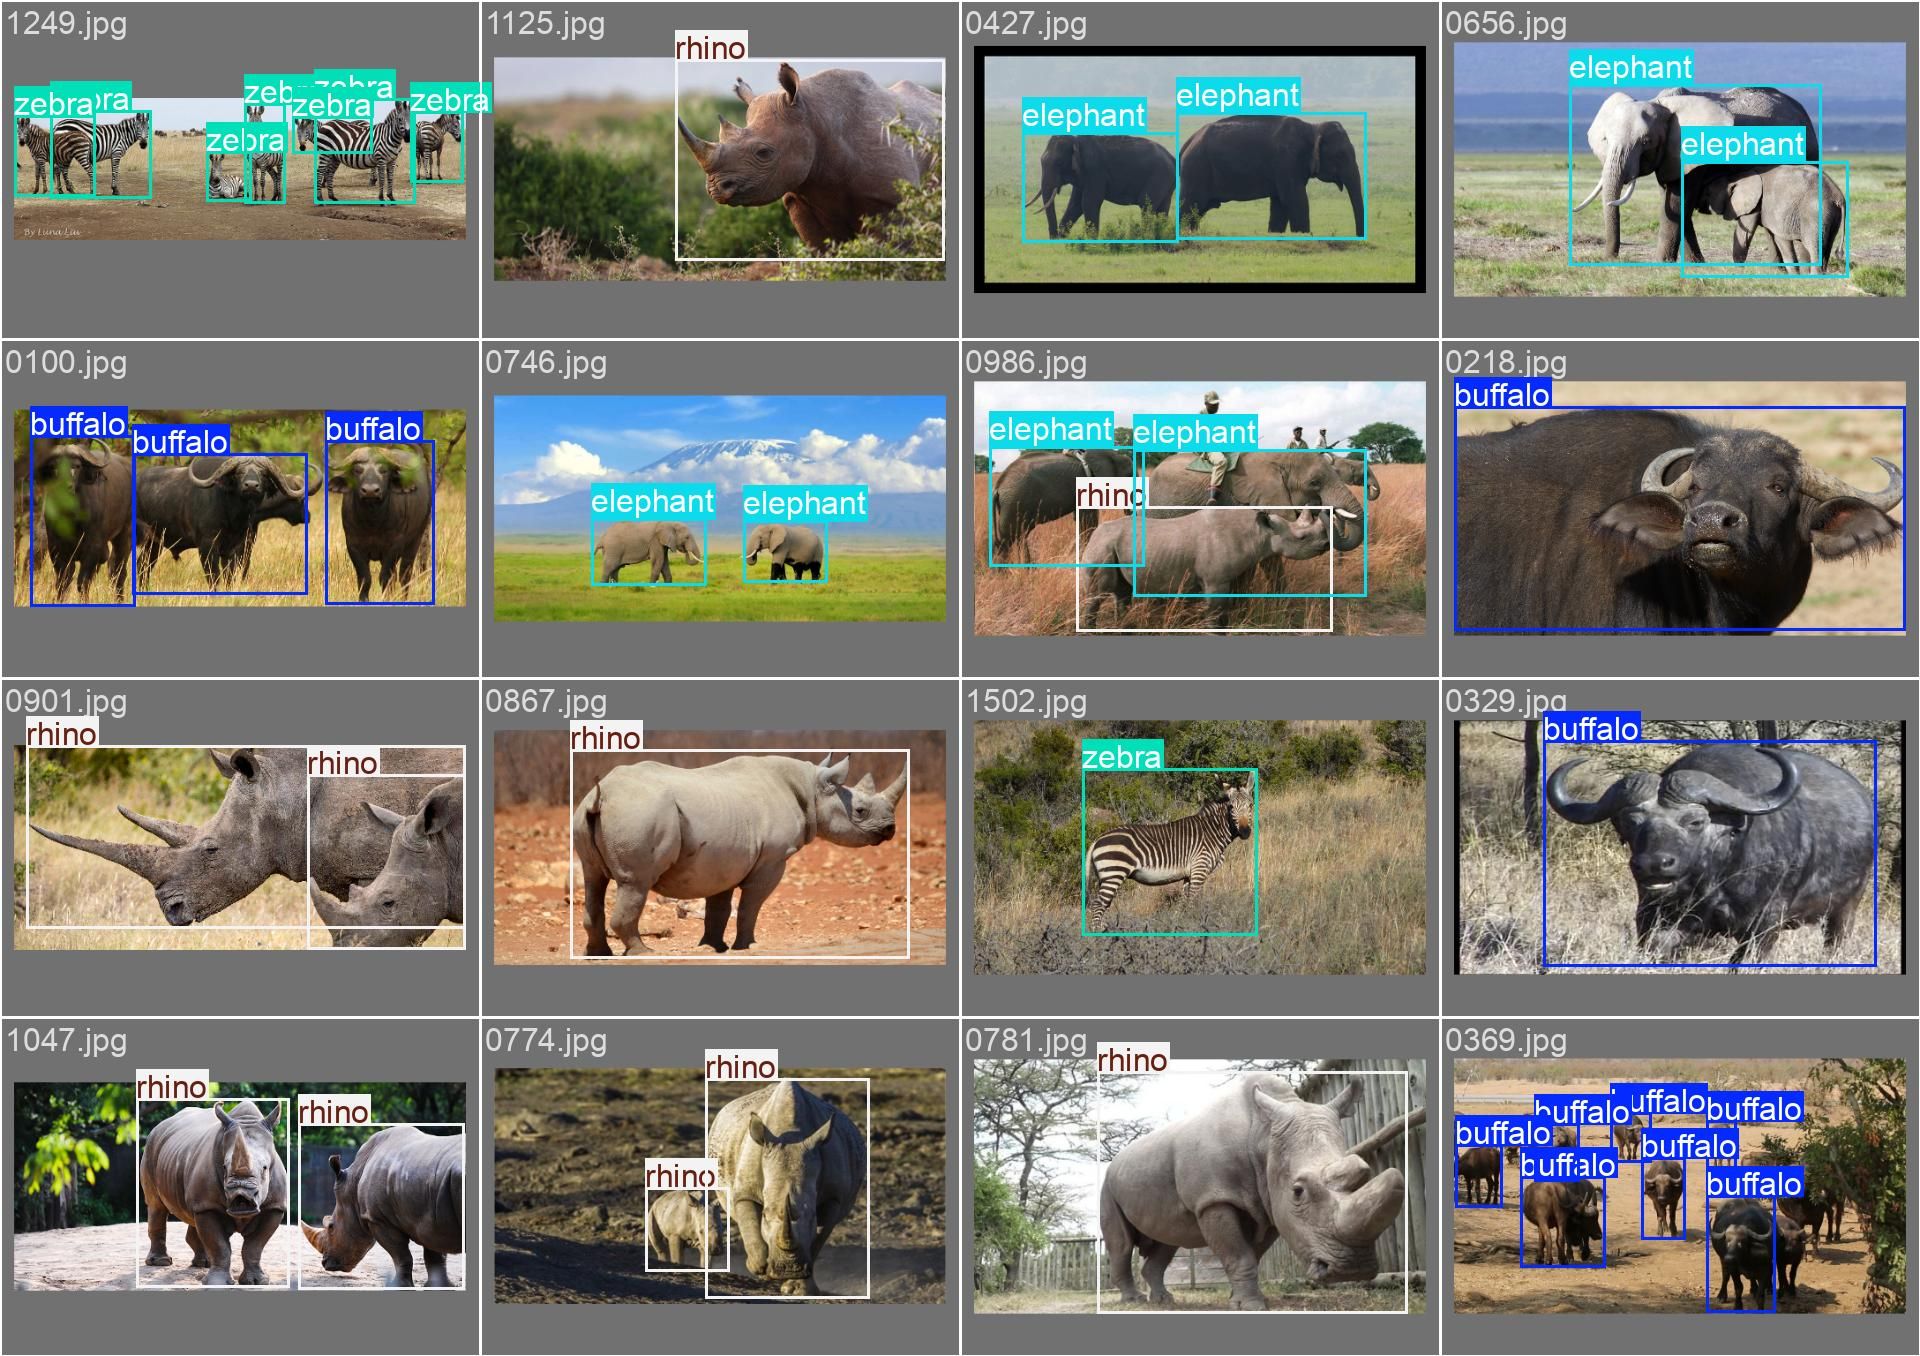

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/wildlife_yolo/val_batch0_labels.jpg')

## 3. Улучшение бейзлайна

### Гипотезы

После проведения первоначального эксперимента с использованием модели YOLOv8 и базовых параметров обучения, были сформулированы и проверены несколько гипотез, направленных на повышение качества модели. Основной целью является улучшение способности модели к обобщению и повышению точности детекции объектов.

####1 Гипотеза: Усиление аугментаций данных
Было выдвинуто предположение, что агрессивные аугментации помогут модели увидеть большее разнообразие комбинаций объектов, фонов и условий съёмки, тем самым улучшив её способность к обобщению.

Для этого были активированы и настроены следующие методы аугментации:

Mosaic — объединение четырёх изображений в одно, что имитирует сложные сцены с множественными объектами.
MixUp — смешивание двух изображений и их аннотаций, что способствует лучшему восприятию перекрывающихся объектов.
Copy-Paste — вставка объектов с аннотациями из одних изображений на другие.
HSV augmentation — увеличение насыщенности, контраста и яркости (hsv_h=0.1, hsv_s=0.8, hsv_v=0.8), что повышает устойчивость к различному освещению.
Повороты и масштабирование — degrees=20, scale=0.8 для повышения устойчивости модели к различным ракурсам объектов.
Horizontal Flip — случайное зеркальное отражение изображений по горизонтали (flipud=0.0, т.к. в YOLOv8 horizontal flip включён по умолчанию).

####2 Гипотеза: Замена оптимизатора на AdamW
В базовой конфигурации YOLO используется оптимизатор SGD. Однако, современные исследования и практика показывают, что AdamW обладает лучшей сходимостью и устойчивостью при обучении на относительно небольших и сложных по структуре наборах данных.

AdamW с более низким стартовым learning rate позволяет эффективнее минимизировать переобучение и повышает стабильность процесса обучения.

####3 Гипотеза: Применение Label Smoothing
Модели object detection склонны к некорректности в своих предсказаниях, что приводит к снижению качества обобщения.
Для смягчения этого эффекта была применена техника Label Smoothing с коэффициентом 0.05.

Это позволяет модели не давать 100% уверенности в предсказаниях, это должно уменьшить вероятность переобучения и сделать поведение модели более «осторожным», особенно на похожих объектах вроде буйвол ↔ носорог ↔ слон.

Создадим новый экземпляр модели

In [ ]:
yolo_impr = YOLO('yolo11n.pt')

Обучим бейзлайн yolo с использованием предложенных гипотез улучшения:

In [16]:
yolo_impr.train(
    data='data8/final_data/data.yaml',
    epochs=15,
    imgsz=512,
    batch=16,
    name='wildlife_yolo_impr',
    optimizer='AdamW',
    lr0=0.001,
    warmup_epochs=3,
    cos_lr=True,
    hsv_h=0.1,
    hsv_s=0.8,
    hsv_v=0.8,
    degrees=20,
    scale=0.8,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.2,
    label_smoothing=0.05,
    amp=True,
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data8/final_data/data.yaml, degrees=20, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.8, hsv_v=0.8, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=wildlife_yolo_impr2, nbs=64, nms=False, opset=None, optimize=False, optimizer

train: Scanning /content/data8/final_data/train/labels.cache... 1203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1203/1203 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 534.8±70.6 MB/s, size: 135.6 KB)


val: Scanning /content/data8/final_data/valid/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


Plotting labels to runs/detect/wildlife_yolo_impr2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/wildlife_yolo_impr2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.23G      1.376      1.626      1.503         24        512: 100%|██████████| 76/76 [00:38<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        150        262      0.795      0.675      0.832      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.23G       1.34      1.474      1.471         23        512: 100%|██████████| 76/76 [00:26<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        150        262      0.816      0.815      0.874      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.23G      1.312      1.394      1.444         23        512: 100%|██████████| 76/76 [00:25<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        150        262      0.891      0.832      0.913      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.23G        1.3      1.393      1.458         27        512: 100%|██████████| 76/76 [00:28<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        150        262      0.812      0.698      0.828      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.23G      1.302      1.387      1.464         11        512: 100%|██████████| 76/76 [00:25<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


                   all        150        262      0.855       0.85      0.918      0.671
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.23G      1.068      1.112      1.372          5        512: 100%|██████████| 76/76 [00:24<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        150        262      0.823       0.78      0.865      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.23G      1.059     0.9876      1.376          5        512: 100%|██████████| 76/76 [00:22<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        150        262      0.898      0.842      0.906      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.23G      1.047     0.9433      1.338          5        512: 100%|██████████| 76/76 [00:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        150        262      0.842       0.84      0.908       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.23G     0.9857     0.8729      1.306          3        512: 100%|██████████| 76/76 [00:26<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        150        262      0.897      0.868      0.929      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.23G     0.9481     0.8113      1.268          5        512: 100%|██████████| 76/76 [00:26<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        150        262       0.89       0.91      0.937      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.23G     0.9285     0.7557      1.252          3        512: 100%|██████████| 76/76 [00:23<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


                   all        150        262      0.897      0.877      0.941       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.23G     0.8888     0.7095      1.225          3        512: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        150        262      0.927      0.884      0.943      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.24G       0.88     0.7126      1.224          3        512: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        150        262       0.92      0.912      0.947      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.25G     0.8774     0.6837       1.21          5        512: 100%|██████████| 76/76 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        150        262      0.938      0.888      0.946      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.25G     0.8522     0.6679      1.183          4        512: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        150        262      0.944      0.893      0.946       0.74



15 epochs completed in 0.120 hours.
Optimizer stripped from runs/detect/wildlife_yolo_impr2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/wildlife_yolo_impr2/weights/best.pt, 5.4MB

Validating runs/detect/wildlife_yolo_impr2/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


                   all        150        262      0.943      0.892      0.947      0.752
               buffalo         38         60       0.93      0.882      0.906      0.753
              elephant         43         83      0.913       0.88      0.947      0.717
                 rhino         42         58          1      0.965      0.993      0.862
                 zebra         28         61      0.928      0.843      0.945      0.674
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/wildlife_yolo_impr2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c650169a8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Гипотеза на таких же вводных не оправдала себя, вероятно требуется большее количество эпох. Датасет не располагает фото с сложными ракурсами, поэтому моё улучшение не дало желаемого результата - изменение ракурса было излишним.

mAP50 = 0.947                             mAP50-95 = 0.752

Улучшения бейзлайна не произошло, но по матрице можно увидеть, что ключевым ухудшением стало, что слоны чаще путаются с фоном, но в остальном можно сказать что качество распознания улучшилось

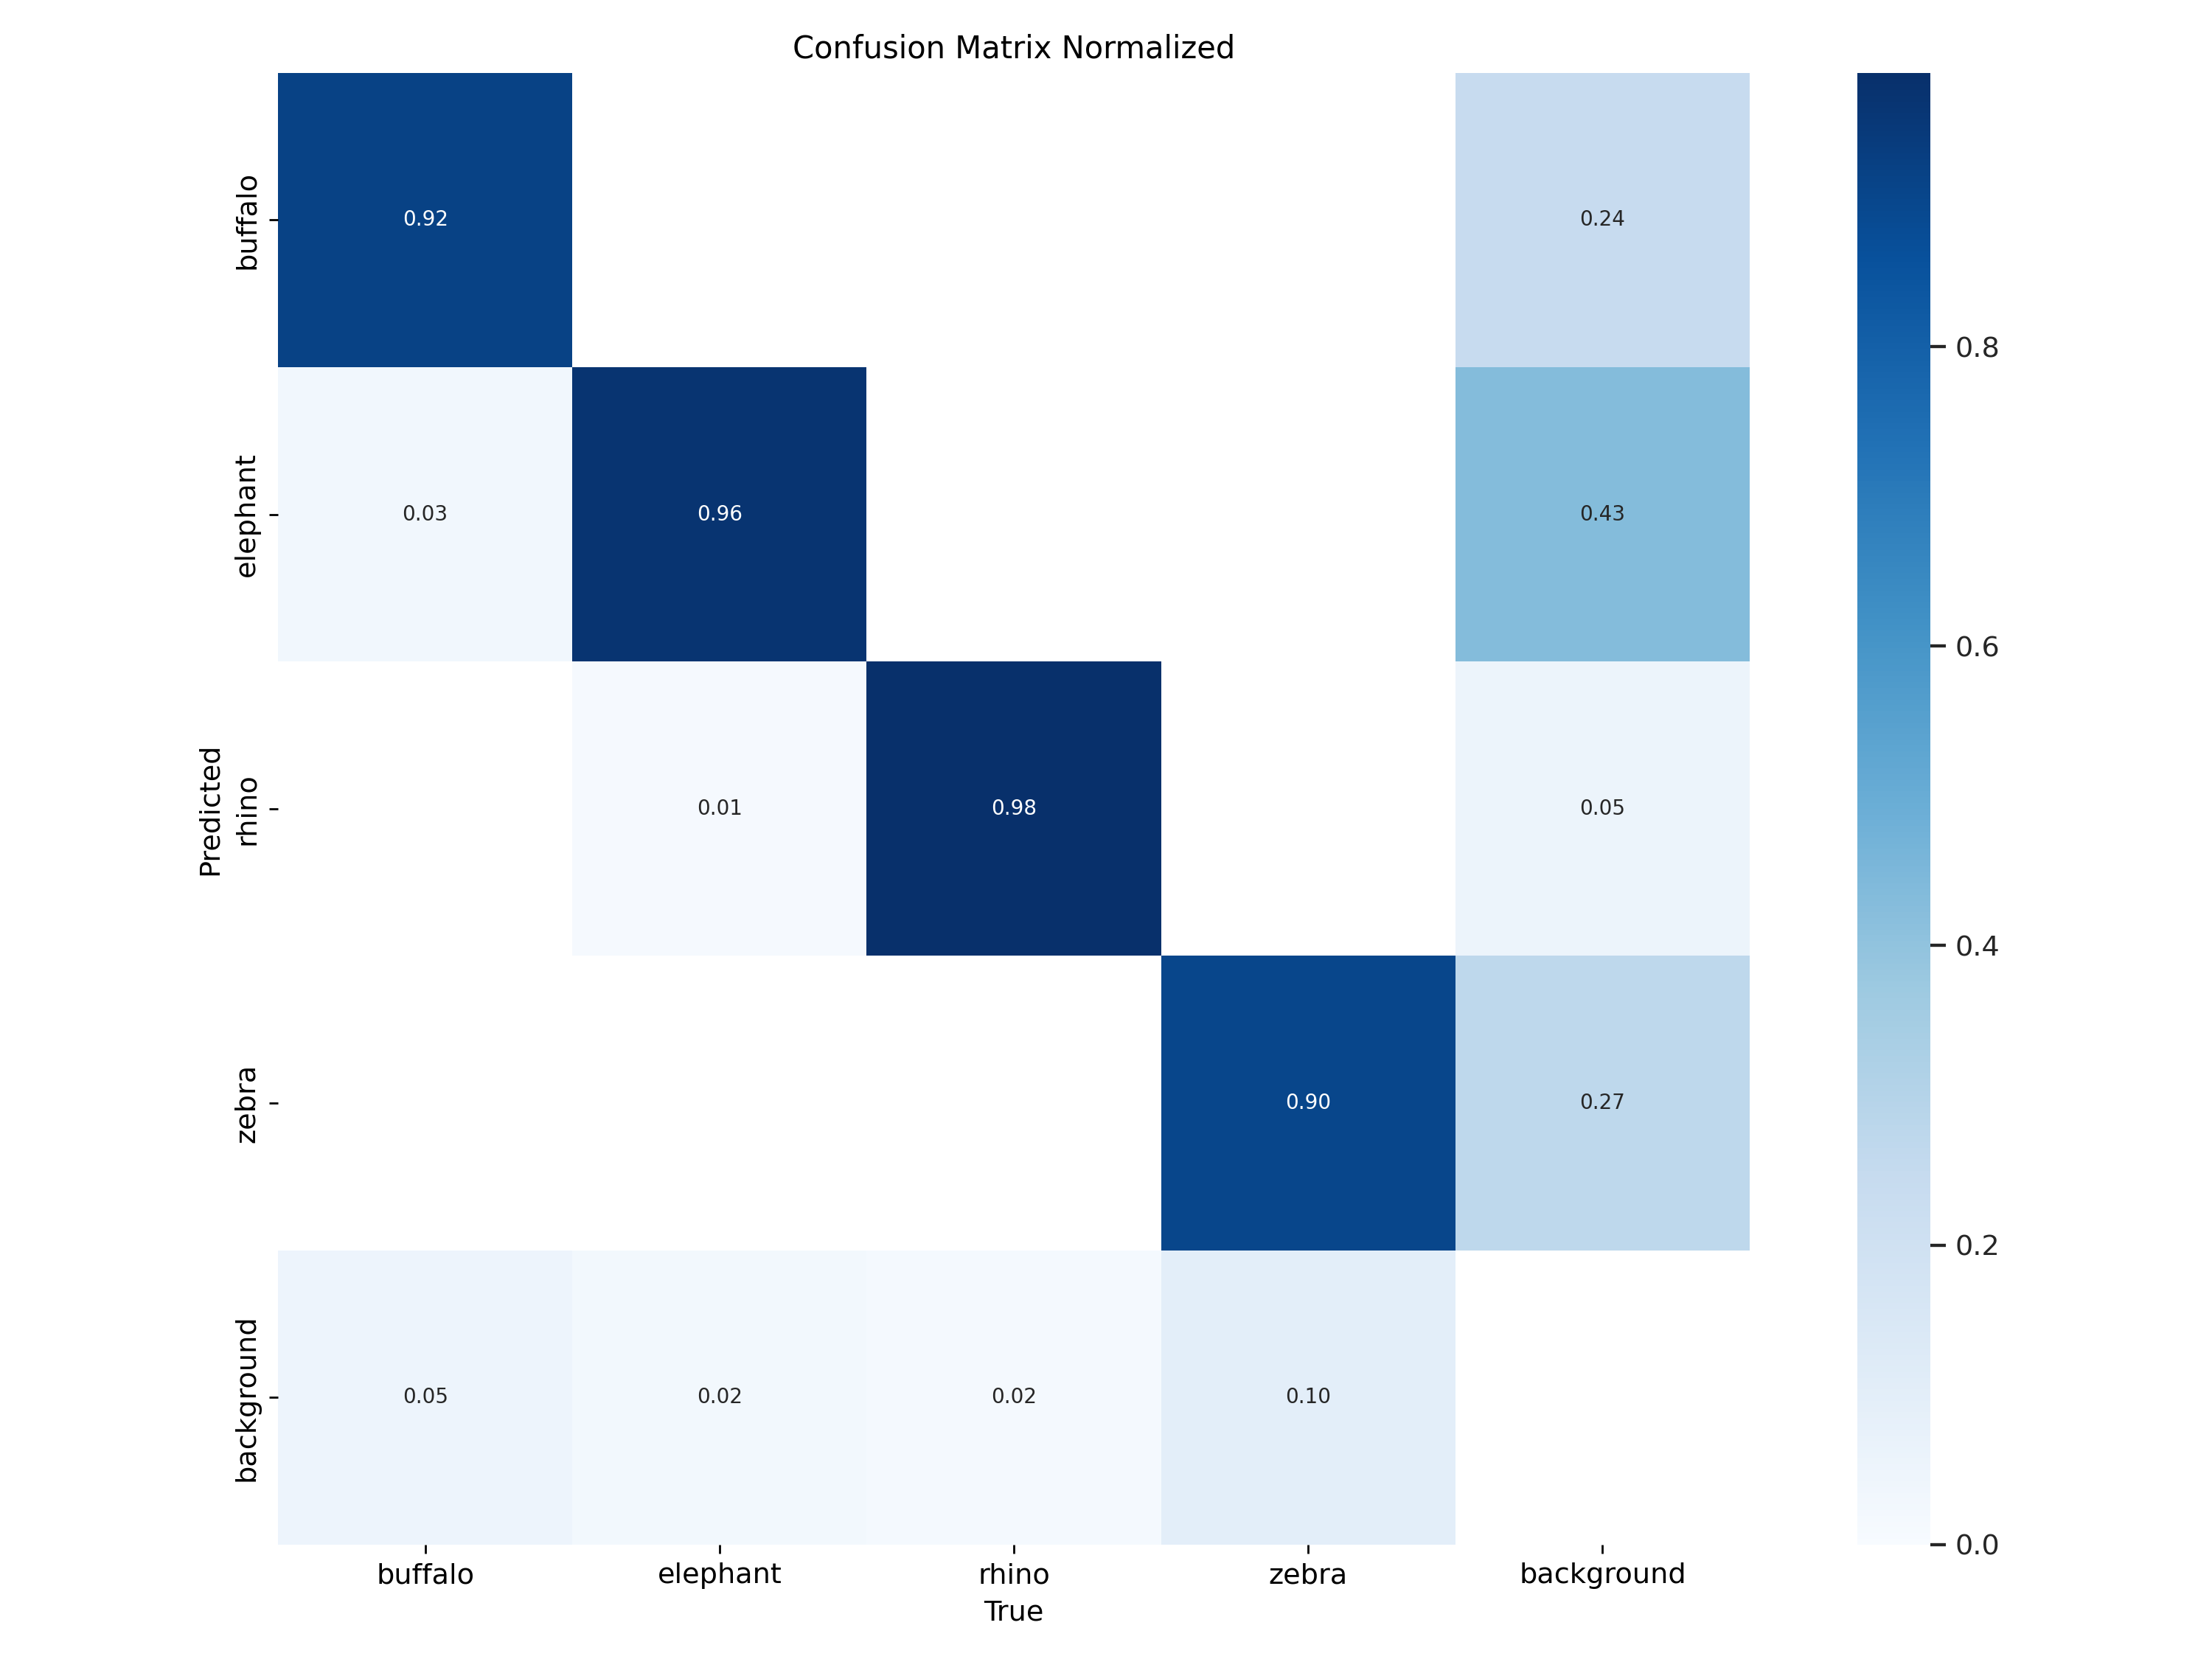

In [21]:
from IPython.display import Image
Image('/content/runs/detect/wildlife_yolo_impr2/confusion_matrix_normalized.png')

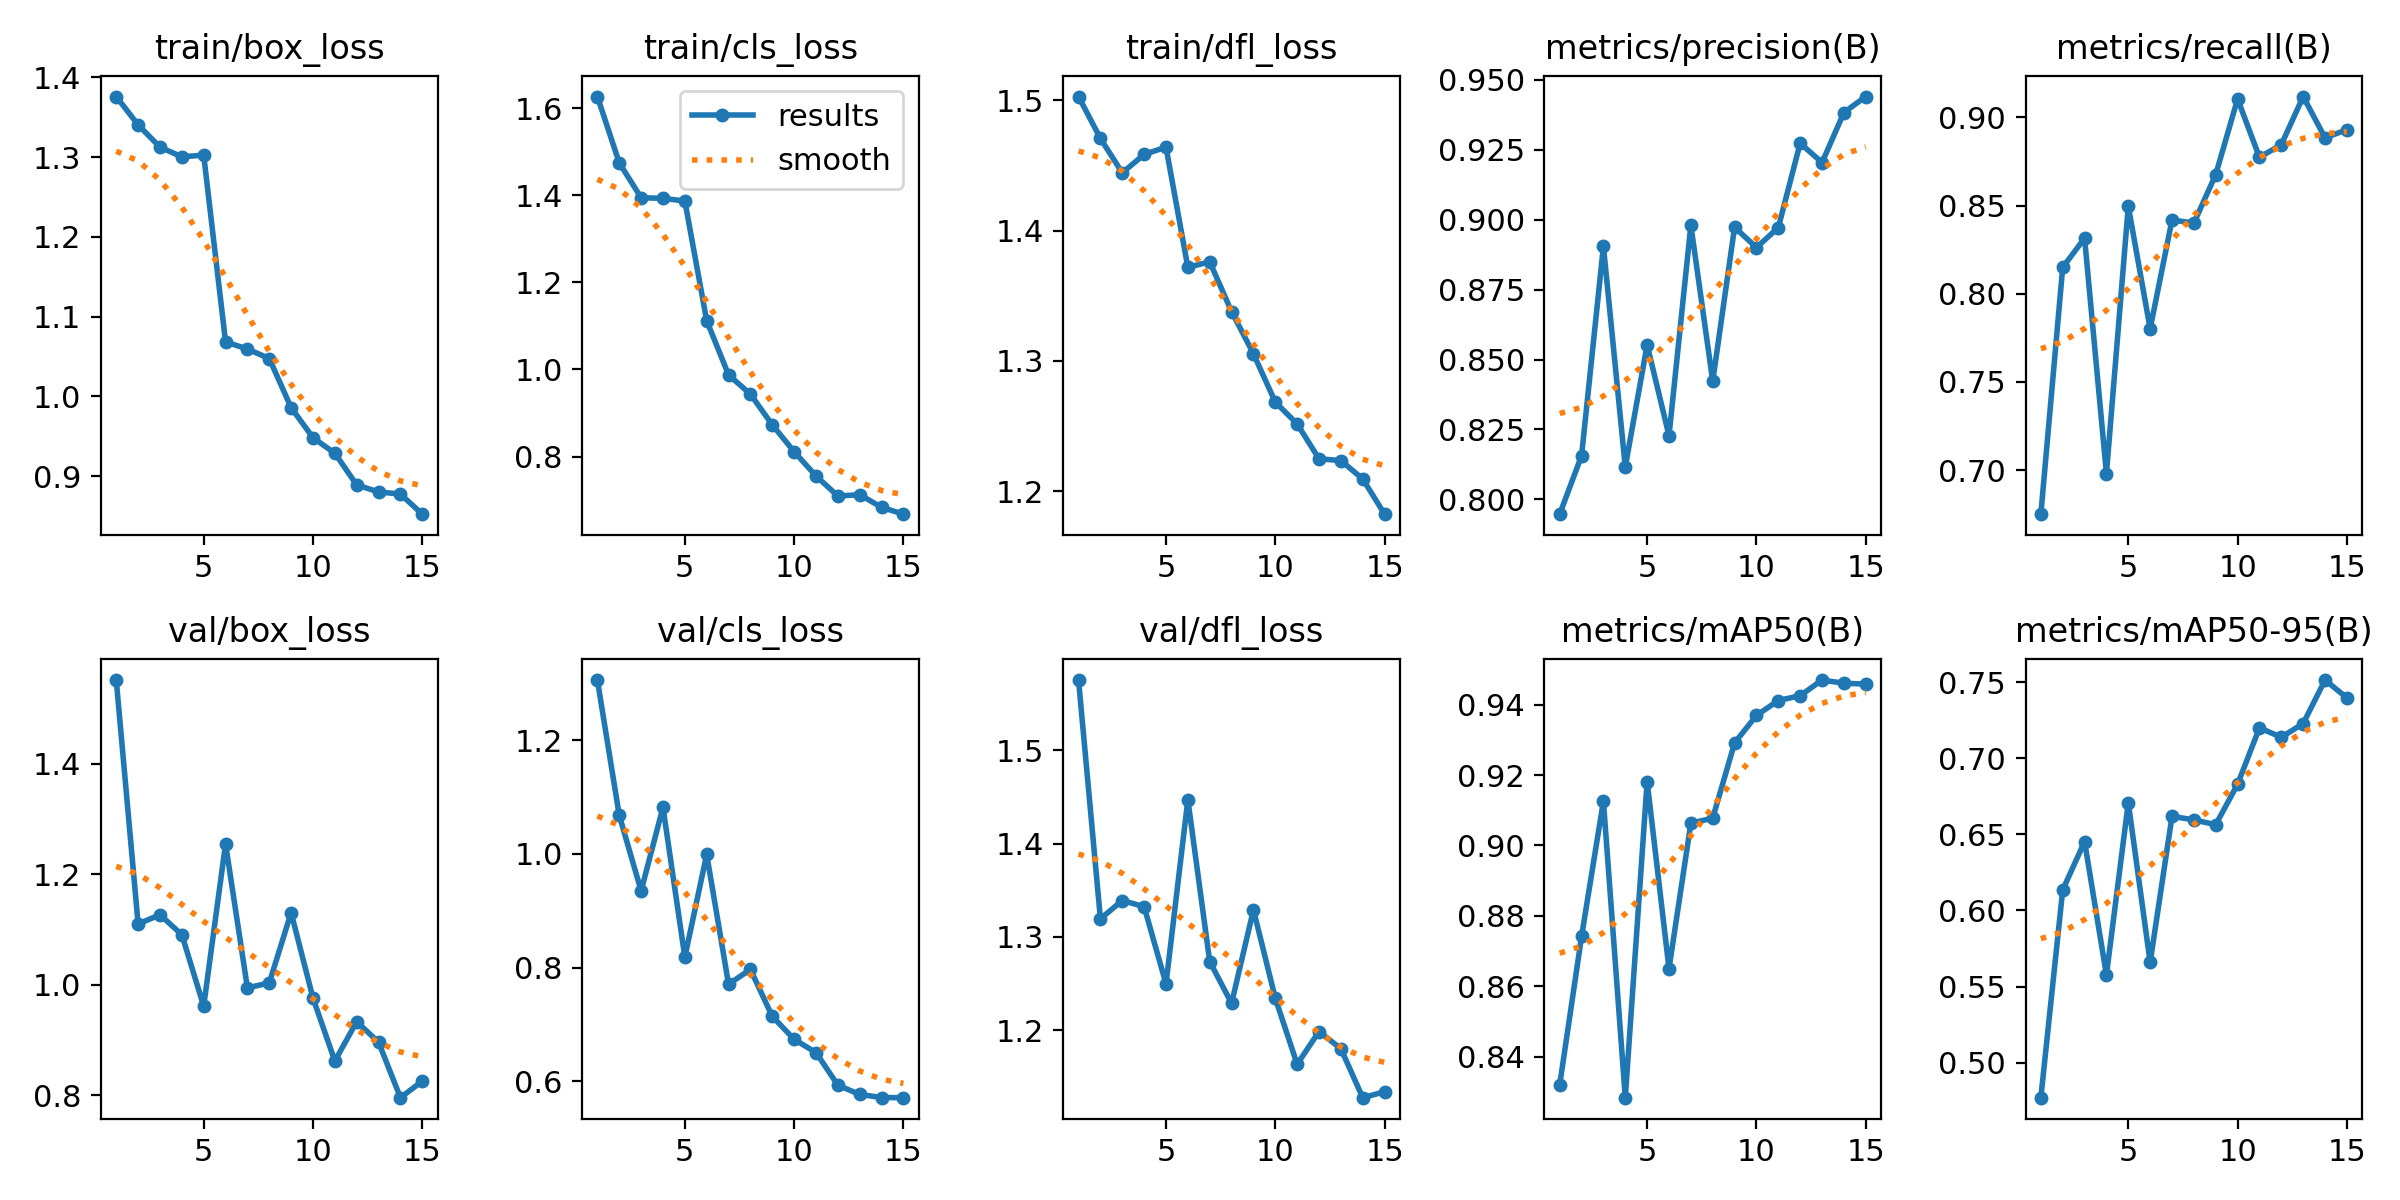

In [23]:
from IPython.display import Image
Image('/content/runs/detect/wildlife_yolo_impr2/results.png')

## 4. Имплементация алгоритма машинного обучения


In [7]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 52.8 MB/s eta 0:00:00


Самостоятельно создадим простую YOLO

In [11]:
import os
from pathlib import Path

import yaml
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as TF
from torchvision.ops import box_convert
from PIL import Image
from torchmetrics.detection.mean_ap import MeanAveragePrecision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


cuda


Определим загрузку данных yolo

In [12]:
with open('data8/final_data/data.yaml', 'r') as file_handle:
    dataset_config = yaml.safe_load(file_handle)

path_images_train = dataset_config.get('train', '')
path_images_val = dataset_config.get('val', '')

path_labels_train = dataset_config.get('train_labels', path_images_train.replace('images', 'labels'))
path_labels_val = dataset_config.get('val_labels', path_images_val.replace('images', 'labels'))

label_names = dataset_config.get('names', [])
total_categories = len(label_names)

print(f"Detected category count: {total_categories}")


found classes: 4


Сформируем функцию для взаимодействия со скачанным датасетом

In [13]:
class YoloDataset(Dataset):
    def __init__(self, img_dir: str, img_size: int = 640):
        self.img_dir = Path(img_dir)
        self.img_paths = sorted([p for p in self.img_dir.iterdir() if p.suffix.lower() in (".jpg", ".jpeg", ".png")])
        self.img_size = img_size

    def __len__(self):
        return len(self.img_paths)

    def _read_labels(self, p: Path):
        if not p.exists():
            return torch.zeros((0, 5), dtype=torch.float32)
        out = []
        with open(p) as f:
            for line in f:
                cls, xc, yc, w, h = map(float, line.strip().split())
                out.append([cls, xc, yc, w, h])
        return torch.tensor(out, dtype=torch.float32)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label_path = Path(str(img_path).replace("/images/", "/labels/")).with_suffix(".txt")
        img = Image.open(img_path).convert("RGB").resize((self.img_size, self.img_size))
        labels = self._read_labels(label_path)
        img = TF.to_tensor(img)
        return img, labels


def yolo_collate(batch):
    imgs, tgts = zip(*batch)
    imgs = torch.stack(imgs)
    merged = []
    for i, t in enumerate(tgts):
        if len(t):
            idx = torch.full((t.size(0), 1), i)
            merged.append(torch.cat([idx, t], 1))
    if merged:
        merged = torch.cat(merged, 0)
    else:
        merged = torch.zeros((0, 6))
    return imgs, merged


In [21]:
train_img_dir = 'data8/final_data/train/images'
train_label_dir = 'data8/final_data/train/labels'
val_img_dir = 'data8/final_data/test/images'
val_label_dir = 'data8/final_data/test/labels'


In [22]:
class Conv(nn.Sequential):
    def __init__(self, c1, c2, k=3, s=1, p=None):
        if p is None:
            p = k // 2
        super().__init__(nn.Conv2d(c1, c2, k, s, p, bias=False), nn.BatchNorm2d(c2), nn.SiLU())

 Сформируем Yolo:

In [23]:
class TinyYOLO(nn.Module):
    def __init__(self, nc=4, anchors=((10, 13), (16, 30), (33, 23))):
        super().__init__()
        self.nc = nc
        self.no = nc + 5
        self.na = len(anchors)
        self.backbone = nn.Sequential(
            Conv(3, 32, 3, 2),
            Conv(32, 64, 3, 2),
            Conv(64, 128, 3, 2),
            Conv(128, 256, 3, 2),
            Conv(256, 512, 3, 2),
        )
        self.head = nn.Conv2d(512, self.na * self.no, 1)

    def forward(self, x):
        x = self.backbone(x)
        b, _, h, w = x.shape
        x = self.head(x).view(b, self.na, self.no, h, w).permute(0, 1, 3, 4, 2).contiguous()
        return x


In [24]:
print(model)

MyYolo(
  (backbon): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, e

Реализуем функцию потерь для нашей Yolo

In [25]:
class YoloLoss(nn.Module):
    def __init__(self, lambda_box=0.05, lambda_obj=1.0, lambda_cls=0.5):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.lambda_box = lambda_box
        self.lambda_obj = lambda_obj
        self.lambda_cls = lambda_cls

    def forward(self, pred, targets):
        bs, na, h, w, no = pred.shape
        obj_mask = torch.zeros(bs, na, h, w, device=pred.device)
        tgt_box = torch.zeros(bs, na, h, w, 4, device=pred.device)
        tgt_cls = torch.zeros(bs, na, h, w, no - 5, device=pred.device)
        if len(targets):
            t = targets.to(pred.device)
            b, cls, xc, yc, bw, bh = t.T
            gx, gy = xc * w, yc * h
            gi, gj = gx.long(), gy.long()
            for idx in range(len(t)):
                obj_mask[int(b[idx]), :, gj[idx], gi[idx]] = 1.0
                tgt_box[int(b[idx]), :, gj[idx], gi[idx]] = torch.tensor(
                    [gx[idx] - gi[idx], gy[idx] - gj[idx], bw[idx] * w, bh[idx] * h], device=pred.device)
                tgt_cls[int(b[idx]), :, gj[idx], gi[idx], int(cls[idx])] = 1.0
        pb = pred[..., :4]
        po = pred[..., 4]
        pc = pred[..., 5:]
        loss_box = F.l1_loss(pb[obj_mask.bool()], tgt_box[obj_mask.bool()]) if obj_mask.sum() else torch.tensor(0.0, device=pred.device)
        loss_obj = self.bce(po, obj_mask)
        loss_cls = self.bce(pc[obj_mask.bool()], tgt_cls[obj_mask.bool()]) if obj_mask.sum() else torch.tensor(0.0, device=pred.device)
        return self.lambda_box * loss_box + self.lambda_obj * loss_obj + self.lambda_cls * loss_cls


Реализация показателей mAP50 и mAP50-95

In [26]:
from tqdm.auto import tqdm

precision50 = MeanAveragePrecision(iou_thresholds=[0.5])
precision_range = MeanAveragePrecision()

def run_training_step(data_loader, net, optim, criterion, device_ctx):
    net.train()
    running_loss = 0.0

    for images_batch, targets_batch, _, _ in data_loader:
        images_batch = images_batch.to(device_ctx)
        targets_batch = targets_batch.to(device_ctx)

        outputs = net(images_batch)
        loss_val = criterion(outputs, targets_batch)

        optim.zero_grad()
        loss_val.backward()
        optim.step()

        running_loss += loss_val.item()

    avg_loss = running_loss / len(data_loader)
    print(f"Epoch loss: {avg_loss:.4f}")

def evaluate_model(data_loader, net, device_ctx, threshold=0.5):
    net.eval()
    precision50.reset()
    precision_range.reset()

    with torch.no_grad():
        for batch in data_loader:
            inputs, _, true_boxes, true_labels = batch
            inputs = inputs.to(device_ctx)
            predictions = net(inputs).cpu()

            for idx in range(inputs.size(0)):
                pred_boxes, pred_scores, pred_classes = [], [], []

                for y in range(S):
                    for x in range(S):
                        confidence = torch.sigmoid(predictions[idx, y, x, 4])
                        if confidence < threshold:
                            continue

                        dx, dy, dw, dh = torch.sigmoid(predictions[idx, y, x, :4])
                        center_x = (x + dx) / S
                        center_y = (y + dy) / S

                        box_w, box_h = dw, dh
                        x_min = (center_x - box_w / 2) * img_size
                        y_min = (center_y - box_h / 2) * img_size
                        x_max = (center_x + box_w / 2) * img_size
                        y_max = (center_y + box_h / 2) * img_size

                        pred_boxes.append([x_min, y_min, x_max, y_max])

                        class_logits = torch.softmax(predictions[idx, y, x, 5:], dim=-1)
                        class_score, class_idx = torch.max(class_logits, dim=-1)
                        pred_scores.append((confidence * class_score).item())
                        pred_classes.append(class_idx.item())

                if pred_boxes:
                    detected = {
                        'boxes': torch.tensor(pred_boxes, dtype=torch.float32),
                        'scores': torch.tensor(pred_scores, dtype=torch.float32),
                        'labels': torch.tensor(pred_classes, dtype=torch.int64)
                    }
                else:
                    detected = {
                        'boxes': torch.zeros((0, 4), dtype=torch.float32),
                        'scores': torch.zeros((0,), dtype=torch.float32),
                        'labels': torch.zeros((0,), dtype=torch.int64)
                    }

                ground_truth = {
                    'boxes': true_boxes[idx].to(torch.float32),
                    'labels': true_labels[idx]
                }

                precision50.update([detected], [ground_truth])
                precision_range.update([detected], [ground_truth])

    score_50 = precision50.compute()
    score_range = precision_range.compute()
    print(f"Validation mAP@50: {score_50['map_50']:.4f}")
    print(f"Validation mAP@50-95: {score_range['map']:.4f}")


Запустим обучение на 15 эпохах и посмотрим на результаты:

In [27]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 15

for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model, optimizer,loss_fn, device)
    eval(val_loader, model, device)


epoch 1 / 15
loss:  189.38770113493266
val mAP50: tensor(0.0538)
val mAP50-95: tensor(0.0145)
epoch 2 / 15
loss:  130.7091064453125
val mAP50: tensor(0.0802)
val mAP50-95: tensor(0.0229)
epoch 3 / 15
loss:  116.25207072810123
val mAP50: tensor(0.0733)
val mAP50-95: tensor(0.0213)
epoch 4 / 15
loss:  107.24472593006335
val mAP50: tensor(0.1282)
val mAP50-95: tensor(0.0425)
epoch 5 / 15
loss:  99.73375338002255
val mAP50: tensor(0.1603)
val mAP50-95: tensor(0.0502)
epoch 6 / 15
loss:  93.65801206387971
val mAP50: tensor(0.1438)
val mAP50-95: tensor(0.0472)
epoch 7 / 15
loss:  87.17867078279194
val mAP50: tensor(0.1043)
val mAP50-95: tensor(0.0387)
epoch 8 / 15
loss:  81.48597742381848
val mAP50: tensor(0.1942)
val mAP50-95: tensor(0.0637)
epoch 9 / 15
loss:  76.83577208769948
val mAP50: tensor(0.1616)
val mAP50-95: tensor(0.0626)
epoch 10 / 15
loss:  71.42813326183118
val mAP50: tensor(0.1495)
val mAP50-95: tensor(0.0556)
epoch 11 / 15
loss:  65.97245458552712
val mAP50: tensor(0.1411)
v

Обучение нельзя назвать качественным, итоговый mAP50 замер у 0.1083, а mAP50-95 на 0.0366 - это очень плохой показатель, чтобы это исправить применю нашу предыдущую теорию улучшения безлайна, отбросив ненужные детали вроде вращения изображения. Увеличу количество эпох

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CustomDetectionDataset(Dataset):
    def __init__(self, image_path, label_path, size=224, grid=7, boxes=1, classes=20,
                 prob_mosaic=1.0, prob_copy=0.1, hue=0.015, sat=0.7, val=0.4,
                 rotate_deg=5, translate_val=0.1, scale_range=0.5, shear_angle=2):

        self.image_path = image_path
        self.label_path = label_path
        self.samples = [f for f in os.listdir(image_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
        self.size = size
        self.S = grid
        self.B = boxes
        self.C = classes
        self.mosaic_chance = prob_mosaic
        self.copy_chance = prob_copy

        self.augment = A.Compose([
            A.HueSaturationValue(hue_shift_limit=int(hue * 180),
                                 sat_shift_limit=int(sat * 255),
                                 val_shift_limit=int(val * 255), p=1.0),
            A.Affine(rotate=rotate_deg,
                     translate_percent={"x": translate_val, "y": translate_val},
                     scale=(1-scale_range, 1+scale_range),
                     shear=shear_angle, p=1.0),
            A.Resize(size, size),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

    def __len__(self):
        return len(self.samples)

    def _fetch_sample(self, index):
        img_file = os.path.join(self.image_path, self.samples[index])
        lbl_file = os.path.join(self.label_path, os.path.splitext(self.samples[index])[0] + '.txt')
        image = Image.open(img_file).convert('RGB').resize((self.size, self.size))

        boxes, labels = [], []
        if os.path.isfile(lbl_file):
            for line in open(lbl_file):
                label, xc, yc, w, h = map(float, line.strip().split())
                boxes.append([xc, yc, w, h])
                labels.append(int(label))
        return image, boxes, labels

    def _generate_mosaic(self, index):
        indexes = [index] + random.sample(range(len(self.samples)), 3)
        half_size = self.size // 2
        canvas = Image.new('RGB', (self.size, self.size))
        all_boxes, all_labels = [], []

        for idx, i in enumerate(indexes):
            img, bboxes, lbls = self._fetch_sample(i)
            img = img.resize((half_size, half_size))
            row, col = divmod(idx, 2)
            x_off, y_off = col * half_size, row * half_size
            canvas.paste(img, (x_off, y_off))
            for box, label in zip(bboxes, lbls):
                new_box = [(col + box[0]) / 2, (row + box[1]) / 2, box[2] / 2, box[3] / 2]
                all_boxes.append(new_box)
                all_labels.append(label)

        return canvas, all_boxes, all_labels

    def _apply_copy_paste(self, base_img, base_boxes, base_labels):
        idx = random.randint(0, len(self.samples) - 1)
        img2, boxes2, labels2 = self._fetch_sample(idx)
        if not boxes2:
            return base_img, base_boxes, base_labels

        sel = random.randint(0, len(boxes2) - 1)
        x, y, w, h = boxes2[sel]
        x1 = int((x - w/2) * self.size)
        y1 = int((y - h/2) * self.size)
        x2 = x1 + int(w * self.size)
        y2 = y1 + int(h * self.size)

        patch = img2.crop((x1, y1, x2, y2)).resize((x2-x1, y2-y1))
        base_img.paste(patch, (x1, y1))
        base_boxes.append([x, y, w, h])
        base_labels.append(labels2[sel])
        return base_img, base_boxes, base_labels

    def __getitem__(self, idx):
        if random.random() < self.mosaic_chance:
            img, boxes, labels = self._generate_mosaic(idx)
        else:
            img, boxes, labels = self._fetch_sample(idx)

        if random.random() < self.copy_chance:
            img, boxes, labels = self._apply_copy_paste(img, boxes, labels)

        valid_boxes, valid_labels = [], []
        for (x, y, w, h), lbl in zip(boxes, labels):
            x1, y1 = x - w/2, y - h/2
            x2, y2 = x + w/2, y + h/2
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(1, x2), min(1, y2)
            if x2 <= x1 or y2 <= y1:
                continue
            cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
            valid_boxes.append([cx, cy, x2 - x1, y2 - y1])
            valid_labels.append(lbl)

        transformed = self.augment(image=np.array(img), bboxes=valid_boxes, category_ids=valid_labels)
        image_tensor = transformed['image']
        final_boxes = transformed['bboxes']
        final_labels = transformed['category_ids']

        target_tensor = torch.zeros((self.S, self.S, 5 * self.B + self.C))
        out_boxes, out_labels = [], []

        for (x, y, w, h), c in zip(final_boxes, final_labels):
            row, col = int(y * self.S), int(x * self.S)
            dx, dy = x * self.S - col, y * self.S - row
            if target_tensor[row, col, 4] == 0:
                target_tensor[row, col, :4] = torch.tensor([dx, dy, w, h])
                target_tensor[row, col, 4] = 1
                target_tensor[row, col, 5 + c] = 1

            x_abs, y_abs = x * self.size, y * self.size
            w_abs, h_abs = w * self.size, h * self.size
            out_boxes.append([x_abs - w_abs/2, y_abs - h_abs/2, x_abs + w_abs/2, y_abs + h_abs/2])
            out_labels.append(c)

        box_tensor = torch.tensor(out_boxes, dtype=torch.float32) if out_boxes else torch.zeros((0, 4), dtype=torch.float32)
        label_tensor = torch.tensor(out_labels, dtype=torch.int64) if out_labels else torch.zeros((0,), dtype=torch.int64)

        if isinstance(image_tensor, np.ndarray):
            image_tensor = torch.from_numpy(image_tensor).permute(2, 0, 1).float() / 255.0
        elif image_tensor.dtype == torch.uint8:
            image_tensor = image_tensor.float() / 255.0

        return image_tensor, target_tensor, box_tensor, label_tensor


d:\Code\AI_labs_2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
with open('data.yaml', 'r') as file:
    cfg = yaml.safe_load(file)

path_train_images = cfg['train']
path_val_images = cfg['val']

path_train_labels = cfg.get('train_labels', path_train_images.replace('images', 'labels'))
path_val_labels = cfg.get('val_labels', path_val_images.replace('images', 'labels'))

categories = cfg['names']
total_classes = len(categories)

print(f"Total detected categories: {total_classes}")


found classes: 4


In [ ]:
from torch.utils.data import DataLoader

def custom_collate(batch_samples):
    images = torch.stack([item[0] for item in batch_samples])
    targets = torch.stack([item[1] for item in batch_samples])
    bbox_list = [item[2] for item in batch_samples]
    label_list = [item[3] for item in batch_samples]
    return images, targets, bbox_list, label_list

image_size = 224
grid_cells, box_count, category_count = 7, 1, total_classes
batch_sz = 16

dataset_train = CustomDetectionDataset(
    path_train_images, path_train_labels,
    size=image_size, grid=grid_cells, boxes=box_count, classes=category_count,
    prob_mosaic=1.0, prob_copy=0.1, hue=0.015, sat=0.7, val=0.4,
    rotate_deg=5, translate_val=0.1, scale_range=0.5, shear_angle=2
)

dataset_val = CustomDetectionDataset(
    path_val_images, path_val_labels,
    size=image_size, grid=grid_cells, boxes=box_count, classes=category_count,
    prob_mosaic=0.0, prob_copy=0.0, hue=0.0, sat=0.0, val=0.0,
    rotate_deg=0, translate_val=0, scale_range=0, shear_angle=0
)

loader_train = DataLoader(
    dataset_train, batch_size=batch_sz, shuffle=True,
    num_workers=0, pin_memory=True, collate_fn=custom_collate
)

loader_val = DataLoader(
    dataset_val, batch_size=batch_sz, shuffle=False,
    num_workers=0, pin_memory=True, collate_fn=custom_collate
)


Меняю оптимизатор, число эпох и lr

In [ ]:
map_metric_50 = MeanAveragePrecision(iou_thresholds=[0.5])
map_metric_full = MeanAveragePrecision()

initial_learning_rate = 1e-4
optimizer_fn = optim.AdamW(model.parameters(), lr=initial_learning_rate)

total_epochs = 50
lr_min_factor = 0.01

scheduler_fn = optim.lr_scheduler.CosineAnnealingLR(
    optimizer_fn,
    T_max=total_epochs,
    eta_min=initial_learning_rate * lr_min_factor
)


In [ ]:
for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model, optimizer,loss_fn, device)
    eval(val_loader, model, device)
    scheduler.step()



epoch 1 / 50
loss:  429.62415855809263
val mAP50: tensor(0.0238)
val mAP50-95: tensor(0.0051)
epoch 2 / 50
loss:  356.37472478966964
val mAP50: tensor(0.0352)
val mAP50-95: tensor(0.0085)
epoch 3 / 50
loss:  334.8641525569715
val mAP50: tensor(0.0474)
val mAP50-95: tensor(0.0170)
epoch 4 / 50
loss:  326.6877659245541
val mAP50: tensor(0.0846)
val mAP50-95: tensor(0.0200)
epoch 5 / 50
loss:  324.2706464466296
val mAP50: tensor(0.0828)
val mAP50-95: tensor(0.0272)
epoch 6 / 50
loss:  320.4614250785426
val mAP50: tensor(0.0654)
val mAP50-95: tensor(0.0172)
epoch 7 / 50
loss:  311.8312039626272
val mAP50: tensor(0.0810)
val mAP50-95: tensor(0.0222)
epoch 8 / 50
loss:  307.5274598974931
val mAP50: tensor(0.0777)
val mAP50-95: tensor(0.0259)
epoch 9 / 50
loss:  306.6687349018298
val mAP50: tensor(0.0708)
val mAP50-95: tensor(0.0195)
epoch 10 / 50
loss:  303.3908556386044
val mAP50: tensor(0.0907)
val mAP50-95: tensor(0.0236)
epoch 11 / 50
loss:  304.06117323825237
val mAP50: tensor(0.0874)
v

Итоговое обучение с измененным безлайном показывает крайне низкий результат

mAP50 - 0.1176 mAP50-95 - 0.033

Гипотеза неудачна и не позволяет улучшить бейзлайн. Архитектура YOLO отличается высокой сложностью, поэтому упрощённые самостоятельные реализации обычно не достигают точности оригинальной модели, которая в рамках моей задачи показала куда более высокие резудьтаты.